### Analysis of Employee data from a tech company called M.io.sphere (made up name). 

#### Here we will look employee turnover, why do employees leave? Churn rates and which people are most likely to leave the company?

#### We will also look at how this differs in relation to location, city

#### Finally, we will look at diversity and gender differences.

Kaggle Link --> https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Download latest version
path_data1 = kagglehub.dataset_download("tawfikelmetwally/employee-dataset")
path_data2 = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

data1 = pd.read_csv(path_data1 + "/employee.csv")
data2 = pd.read_csv("C:/Users/janus/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
data1.isnull().sum() #no missing values

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

### Looking at the Gender and pay in the company

Average Payment Tier for males: 2.8067
Average Payment Tier for females: 2.5376


c:\Users\janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


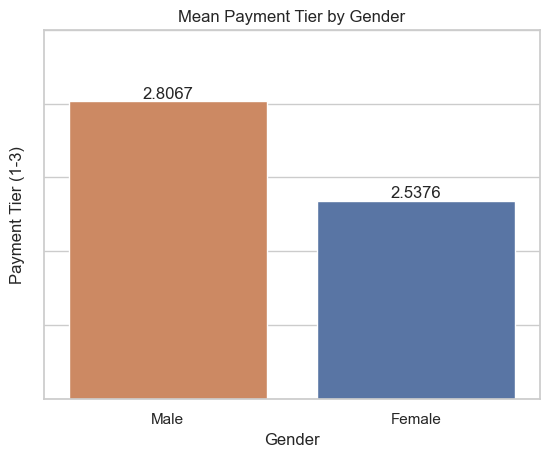

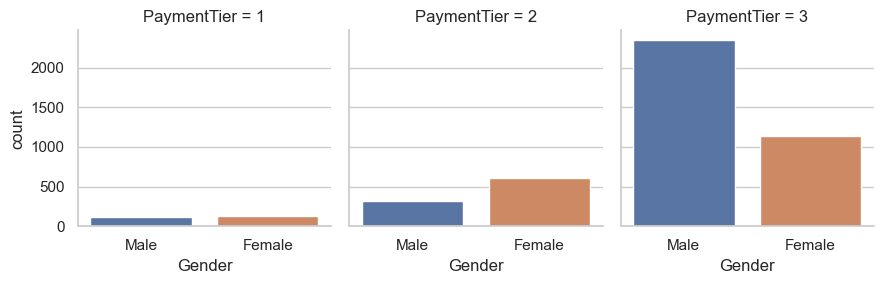

In [5]:
# Set order of Gender
gender_order = ["Male", "Female"]

# Calculate the average PaymentTier for each gender
male_payment_tier_mean = data1[data1['Gender'] == "Male"]['PaymentTier'].mean()
print(f"Average Payment Tier for males: {round(male_payment_tier_mean, 4)}")
female_payment_tier_mean = data1[data1['Gender'] == "Female"]['PaymentTier'].mean()
print(f"Average Payment Tier for females: {round(female_payment_tier_mean, 4)}")

# Plot the mean PaymentTier by Gender
payment_tier_by_gender = data1.groupby('Gender')['PaymentTier'].mean()

sns.set_theme(style="whitegrid")
meanpay = sns.barplot(x = payment_tier_by_gender.index,y = payment_tier_by_gender,hue=payment_tier_by_gender.index, order=gender_order)
meanpay.set_title("Mean Payment Tier by Gender")
meanpay.set_ylim(2, 3)
meanpay.set_ylabel("Payment Tier (1-3)")
meanpay.set(yticklabels=[])

for i in meanpay.containers:
    meanpay.bar_label(i,)

#plot individual payment tiers by gender
grid = sns.FacetGrid(data1, col = "PaymentTier", hue="Gender")
grid.map(sns.countplot,"Gender")

### Above we see that on average, males are in a higher band salary than woman at the company. This is driven by double the men being present in the third payment tier, less so in the second, and not present in the first tier. 

### Below, we visualise the number of male and female employees at the company and the proportion of them in the third payment tier

And we see there is almost 1.5 times more male employees than female employees. Indicative of a probable bias toward male employment. Despite the greater number of men in the third payment tier (85%), a large proportion of the women employed by the organisation are in the third tier of payment (60%) too, this means that of the smaller number of women in the organistion, a large proportion of them are still being payed a large amount. 

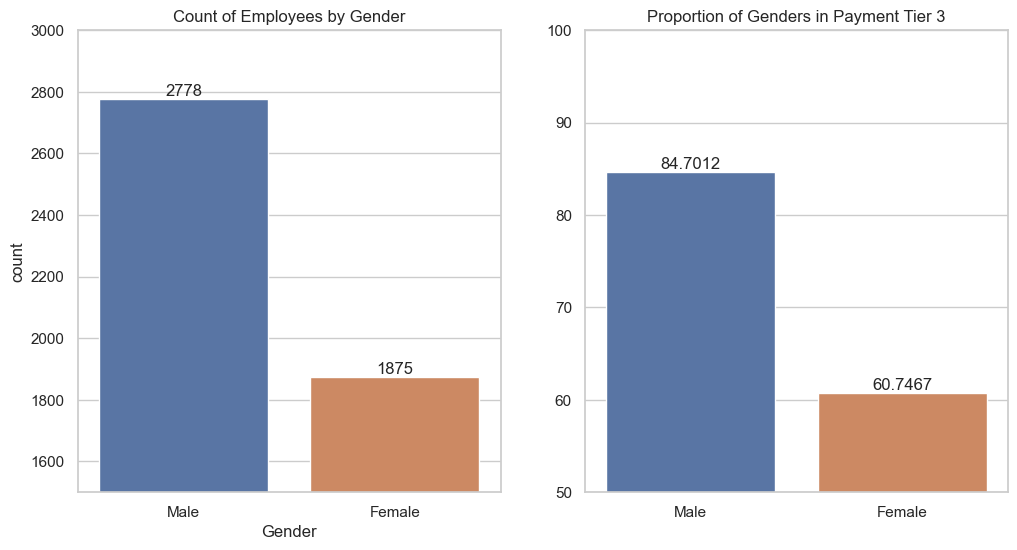

In [6]:
# Set up multi plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#plot count
sns.countplot(x = data1["Gender"],hue= data1["Gender"], order=gender_order,ax=axes[0])
axes[0].set_ylim(1500, 3000)
axes[0].set_title("Count of Employees by Gender")
#axes[0].set(yticklabels=[])

for i in axes[0].containers:
   axes[0].bar_label(i,)
    
#plot proportion

data1t3 = data1[(data1["PaymentTier"] == 3)]
t3counts = data1t3["Gender"].value_counts() 
counts = data1["Gender"].value_counts() 
mentprop = (t3counts.iloc[0] /  counts.iloc[0])*100
femaleprop = (t3counts.iloc[1] / counts.iloc[1])*100

props = [mentprop, femaleprop]
sns.barplot(x = gender_order, y = props, ax=axes[1],hue=gender_order)

axes[1].set_ylim(50, 100)
axes[1].set_title("Proportion of Genders in Payment Tier 3")
#axes[1].set(yticklabels=[])

for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()

### Are they significantly different? 

##	Welch Two Sample t-test

### There was a significant difference between mean pay of men and woman at the company (p < .005), specifically, there was significantly less pay for women. 

RStudio:  Pay by Gender
t = -15.737, df = 3349.6, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is less than 0
95 percent confidence interval:
      -Inf -0.240961
sample estimates:
mean in group Female   mean in group Male 
            2.537600             2.806695 

### This effect we've found throughout the company, but can we localise it to a particular branch of a company?

### Additionally, has the gender pay gap at the company improved over time? 

<Axes: xlabel='City', ylabel='PaymentTier'>

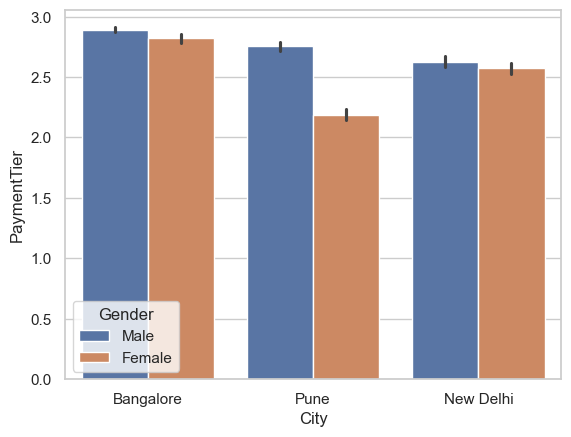

In [ ]:
payment_tier_by_gender_location = data1.groupby(["Gender","City"])['PaymentTier'].mean()
payment_tier_by_gender_location

sns.barplot(x=data1["City"],y=data1["PaymentTier"],hue=data1["Gender"])
# We can see that the pay gap may be driven by differences in the Pune branch